#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.
/Users/lishunbin/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/lishunbin/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/lishunbin/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/lishunbin/opt/anaconda3/l

# 資料準備

In [2]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

170500096/170498071 [==============================] - 35s 0us/step


In [3]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [4]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [5]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [7]:
model = Sequential()

In [8]:
#卷積層1

In [9]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

In [10]:
model.add(Dropout(rate=0.25))

In [11]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [12]:
#卷積層2與池化層2

In [13]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [14]:
model.add(Dropout(0.25))

In [15]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [16]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [17]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [18]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [19]:
model.add(Dense(10, activation='softmax'))

In [20]:
#檢查model 的STACK
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)             

# 載入之前訓練的模型

In [21]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

### Categorical Crossentropy

In [22]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

'''
作業:
請分別選用 "MSE", "binary _crossentropy"
查看Train/test accurancy and loss rate
'''

'\n作業:\n請分別選用 "MSE", "binary _crossentropy"\n查看Train/test accurancy and loss rate\n'

In [23]:
train_history = model.fit(x_img_train_normalize, y_label_train_OneHot, 
                          validation_split=0.3, 
                          epochs=20, batch_size=256, verbose=1)


Train on 35000 samples, validate on 15000 samples
Epoch 1/20
35000/35000 [==============================] - 97s 3ms/step - loss: 2.2553 - accuracy: 0.1533 - val_loss: 2.2044 - val_accuracy: 0.2521
Epoch 2/20
35000/35000 [==============================] - 95s 3ms/step - loss: 2.0893 - accuracy: 0.2410 - val_loss: 2.0767 - val_accuracy: 0.2966
Epoch 3/20
35000/35000 [==============================] - 94s 3ms/step - loss: 1.9832 - accuracy: 0.2861 - val_loss: 2.0060 - val_accuracy: 0.3191
Epoch 4/20
35000/35000 [==============================] - 96s 3ms/step - loss: 1.9284 - accuracy: 0.3104 - val_loss: 1.9356 - val_accuracy: 0.3521
Epoch 5/20
35000/35000 [==============================] - 108s 3ms/step - loss: 1.8684 - accuracy: 0.3377 - val_loss: 1.9351 - val_accuracy: 0.3415
Epoch 6/20
35000/35000 [==============================] - 106s 3ms/step - loss: 1.8082 - accuracy: 0.3586 - val_loss: 1.8459 - val_accuracy: 0.3892
Epoch 7/20
35000/35000 [==============================] - 106s 3m

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

# draw function
def show_acc(train_acc, test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()

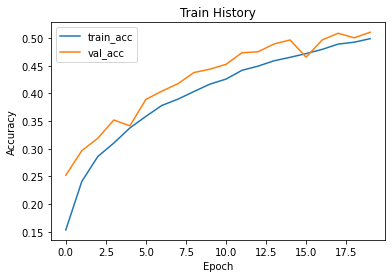

In [51]:
show_acc('accuracy', 'val_accuracy')
# 因為keras庫的版本不同，所以要把acc改成accuracy

In [45]:
def show_loss(train_acc, test_acc):
    plt.plot(train_history.history['loss'])
    plt.plot(train_history.history['val_loss'])
    plt.title('Train History')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train_loss', 'val_loss'], loc='upper left')
    plt.show()

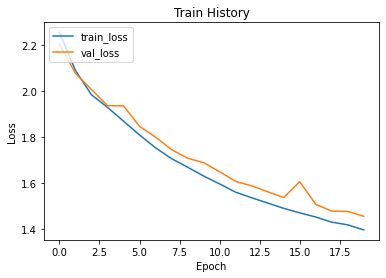

In [46]:
show_loss('loss', 'val_loss')

### MSE

In [52]:
model.compile(loss='MSE', optimizer='sgd', metrics=['accuracy'])

In [53]:
train_history = model.fit(x_img_train_normalize, y_label_train_OneHot, 
                          validation_split=0.3, 
                          epochs=20, batch_size=256, verbose=1)

Train on 35000 samples, validate on 15000 samples
Epoch 1/20
35000/35000 [==============================] - 110s 3ms/step - loss: 0.0629 - accuracy: 0.5067 - val_loss: 0.0653 - val_accuracy: 0.5229
Epoch 2/20
35000/35000 [==============================] - 103s 3ms/step - loss: 0.0630 - accuracy: 0.5063 - val_loss: 0.0652 - val_accuracy: 0.5244
Epoch 3/20
35000/35000 [==============================] - 99s 3ms/step - loss: 0.0628 - accuracy: 0.5090 - val_loss: 0.0651 - val_accuracy: 0.5259
Epoch 4/20
35000/35000 [==============================] - 99s 3ms/step - loss: 0.0628 - accuracy: 0.5096 - val_loss: 0.0651 - val_accuracy: 0.5264
Epoch 5/20
35000/35000 [==============================] - 100s 3ms/step - loss: 0.0628 - accuracy: 0.5088 - val_loss: 0.0651 - val_accuracy: 0.5251
Epoch 6/20
35000/35000 [==============================] - 104s 3ms/step - loss: 0.0626 - accuracy: 0.5112 - val_loss: 0.0650 - val_accuracy: 0.5267
Epoch 7/20
35000/35000 [==============================] - 102s 3

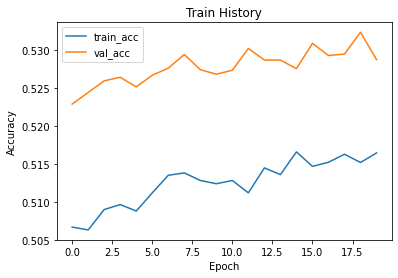

In [54]:
show_acc('accuracy', 'val_accuracy')

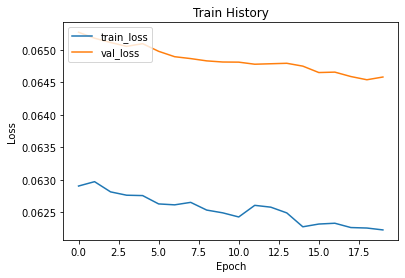

In [55]:
show_loss('loss', 'val_loss')

### Binary Crossentropy

In [57]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [58]:
train_history = model.fit(x_img_train_normalize, y_label_train_OneHot, 
                          validation_split=0.3, 
                          epochs=20, batch_size=256, verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 35000 samples, validate on 15000 samples
Epoch 1/20
35000/35000 [==============================] - 102s 3ms/step - loss: 0.2107 - accuracy: 0.9176 - val_loss: 0.2199 - val_accuracy: 0.9120
Epoch 2/20
35000/35000 [==============================] - 91s 3ms/step - loss: 0.2101 - accuracy: 0.9176 - val_loss: 0.2200 - val_accuracy: 0.9119
Epoch 3/20
35000/35000 [==============================] - 92s 3ms/step - loss: 0.2103 - accuracy: 0.9176 - val_loss: 0.2199 - val_accuracy: 0.9119
Epoch 4/20
35000/35000 [==============================] - 92s 3ms/step - loss: 0.2098 - accuracy: 0.9177 - val_loss: 0.2191 - val_accuracy: 0.9125
Epoch 5/20
35000/35000 [==============================] - 96s 3ms/step - loss: 0.2099 - accuracy: 0.9180 - val_loss: 0.2193 - val_accuracy: 0.9122
Epoch 6/20
35000/35000 [==============================] - 96s 3ms/step - loss: 0.2095 - accuracy: 0.9181 - val_loss: 0.2

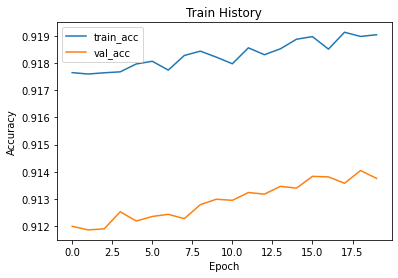

In [59]:
show_acc('accuracy', 'val_accuracy')

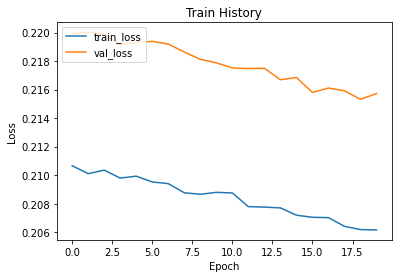

In [60]:
show_loss('loss', 'val_loss')